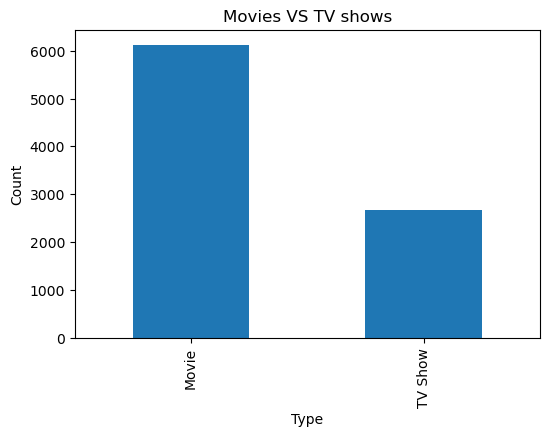

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv(r"E:\ML\netflix_titles.csv")
# 1. Fill missing values
df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")
df['date_added'] = df['date_added'].fillna("Unknown")
# 2. Clean country: keep only first country
df['country'] = df['country'].apply(lambda x: x.split(",")[0].strip())
# 3. Extract numeric duration
df['duration_num'] = df['duration'].str.extract(r'(\d+)').astype(float)
# 4. Clean genres
df['listed_in'] = df['listed_in'].str.lower().str.strip()
# print("Country sample:", df['country'].head(10).tolist())
# print("Duration num sample:", df['duration_num'].head(10).tolist())
# print("Genres sample:", df['listed_in'].head(10).tolist())
df['type'].value_counts().plot(kind='bar',figsize=(6,4))
plt.title("Movies VS TV shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()
           

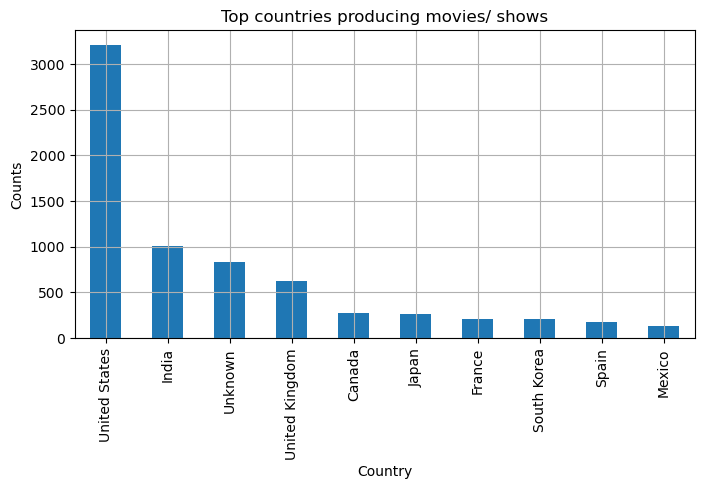

In [4]:
df['country'].value_counts().head(10).plot(kind='bar',figsize=(8,4),grid=True)
plt.title("Top countries producing movies/ shows")
plt.xlabel("Country")
plt.ylabel("Counts")
plt.show()


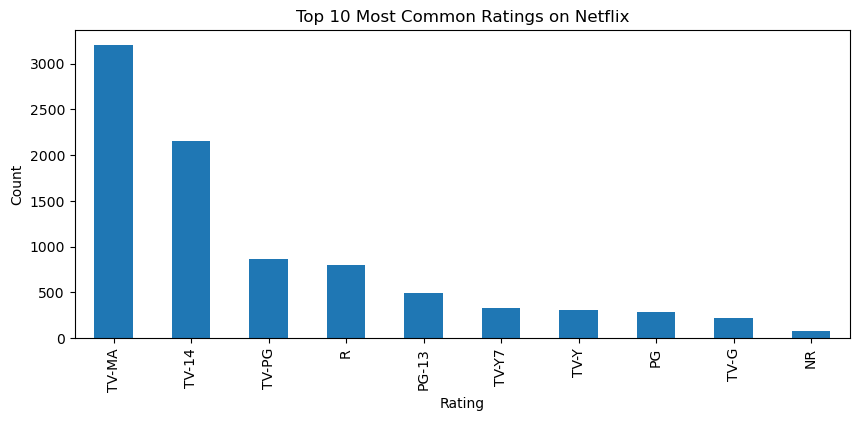

In [5]:
df['rating'].value_counts().head(10).plot(kind='bar', figsize=(10,4))
plt.title("Top 10 Most Common Ratings on Netflix")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [8]:
from collections import Counter
genre_list = df['listed_in'].str.split(', ')
all_genres = []
for genres in genre_list:
    all_genres.extend(genres)
genre_counts = Counter(all_genres)
genre_counts.most_common(10)


[('international movies', 2752),
 ('dramas', 2427),
 ('comedies', 1674),
 ('international tv shows', 1351),
 ('documentaries', 869),
 ('action & adventure', 859),
 ('tv dramas', 763),
 ('independent movies', 756),
 ('children & family movies', 641),
 ('romantic movies', 616)]

release_year
2012     237
2013     288
2014     352
2015     560
2016     902
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, dtype: int64


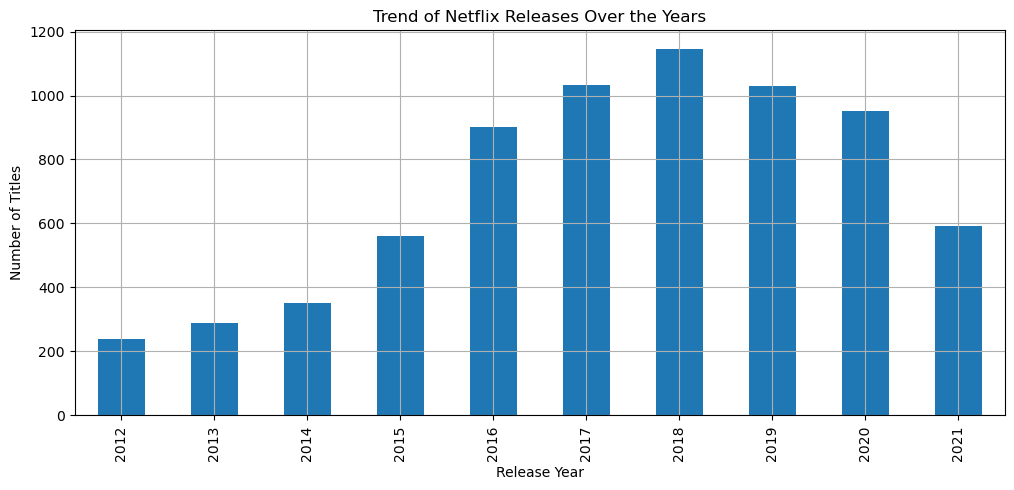

In [23]:
year_counts = df['release_year'].value_counts().head(10).sort_index()
print(year_counts)
plt.figure(figsize=(12,5))
year_counts.plot(kind='bar')
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.title("Trend of Netflix Releases Over the Years")
plt.grid(True)
plt.show()


In [24]:
import nltk
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
def clean_text(text):
    # lowercase
    text = text.lower()
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text
df["clean_description"] = df["description"].astype(str).apply(clean_text)
df[["description", "clean_description"]].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,description,clean_description
0,"As her father nears the end of his life, filmm...",father nears end life filmmaker kirsten johnso...
1,"After crossing paths at a party, a Cape Town t...",crossing paths party cape town teen sets prove...
2,To protect his family from a powerful drug lor...,protect family powerful drug lord skilled thie...
3,"Feuds, flirtations and toilet talk go down amo...",feuds flirtations toilet talk go among incarce...
4,In a city of coaching centers known to train I...,city coaching centers known train india’s fine...
